<a href="https://colab.research.google.com/github/zeynepsenatatli/MachineLearningExercises/blob/main/UE4_C3E1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Training MNIST Dataset

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# scale input data between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train.shape

(60000, 28, 28)

In [ ]:
# # Split the training set into a validation set and a training set
# X_valid, X_train = X_train_all[:5000], X_train_all[5000:]
# y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

4


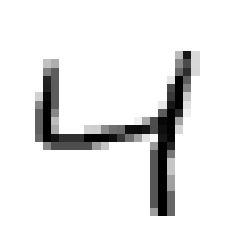

In [ ]:
print(y_train[2])
plt.figure(figsize=(3,3))
plt.imshow(X_train[2], cmap="binary")
plt.axis('off')
plt.show()

Flatten MNIST Data

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[1])

# X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1] * X_valid.shape[1])

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_test.shape

(10000, 784)

### KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
first_accuracy = knc.score(X_test, y_test)
first_accuracy

0.9688

In [ ]:
parameters = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

grid_search = GridSearchCV(knc, parameters, cv=5)
grid_search.fit(X_train[:10_000], y_train[:10_000])

print(grid_search.best_params_)
print(grid_search.best_score_)

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.9423999999999999


In [ ]:
grid_search.best_estimator_.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [ ]:
new_accuracy = grid_search.score(X_test, y_test)
new_accuracy

0.9717